In [1]:
import pandas as pd

In [2]:
dfpos=pd.read_excel('pos.xlsx',header=None).astype(str)
dfneg=pd.read_excel('neg.xlsx',header=None).astype(str)

In [3]:
dfpos['y']=1
dfneg['y']=0

In [4]:
df0=dfpos.append(dfneg,ignore_index=True)
df0.head()

,0,y
0,我正在写这本书的心得，勘误和疑点，有兴趣的朋友可以访问我的网站，交流切磋。www.small...,1
1,本人是一名大一学生，大一的生活一直处于浑浑噩噩的状态，直到我看到了这本书。它对于我的意义远远...,1
2,当时是因为要写读书报告 所以上网到处抄 就发现这本书感觉以前自己没看过中文版的骆驼祥子就看过...,1
3,《水知道答案》这本书我一口气买了5本，是因为这本书太好了，因为人体的70%都是水，对着水说爱...,1
4,忍不住再说几句，这本书大多内容是参考其他书籍的，例如P37，内容是参考《金属切削机床》的，参...,1


In [8]:
#分词和预处理，生成list of list 格式
import jieba
df0['cut']=df0[0].apply(jieba.lcut)#lcut直接生成一个列表，cut是一个生成器
df0.head()

,0,y,cut
0,我正在写这本书的心得，勘误和疑点，有兴趣的朋友可以访问我的网站，交流切磋。www.small...,1,"[我, 正在, 写, 这, 本书, 的, 心得, ，, 勘误, 和, 疑点, ，, 有, 兴..."
1,本人是一名大一学生，大一的生活一直处于浑浑噩噩的状态，直到我看到了这本书。它对于我的意义远远...,1,"[本人, 是, 一名, 大一, 学生, ，, 大一, 的, 生活, 一直, 处于, 浑浑噩噩..."
2,当时是因为要写读书报告 所以上网到处抄 就发现这本书感觉以前自己没看过中文版的骆驼祥子就看过...,1,"[当时, 是因为, 要, 写, 读书, 报告, , 所以, 上网, 到处, 抄, , 就..."
3,《水知道答案》这本书我一口气买了5本，是因为这本书太好了，因为人体的70%都是水，对着水说爱...,1,"[《, 水, 知道, 答案, 》, 这, 本书, 我, 一口气, 买, 了, 5, 本, ，..."
4,忍不住再说几句，这本书大多内容是参考其他书籍的，例如P37，内容是参考《金属切削机床》的，参...,1,"[忍不住, 再说, 几句, ，, 这, 本书, 大多, 内容, 是, 参考, 其他, 书籍,..."


In [9]:
#划分训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df0.cut,df0.y,test_size=0.3)
x_train[:2]

9841     [饭店, 较, 新, ,, 服务, 不错, ,, 旁边, 有, 小, 便利店, ,, 就是,...
29576    [外壳, 塑料, 感太强, 了, ！, 一看, 就, 觉得, 是, 低档, 货, ，, 为什...
Name: cut, dtype: object

In [16]:
#设置Word2vec模型
from gensim.models.word2vec import Word2Vec
n_dim=300 #指定向量维度，大样本时300-500
w2vmodel=Word2Vec(size=n_dim,min_count=10)
w2vmodel.build_vocab(x_train)#生成词表
w2vmodel.train(x_train,total_examples=w2vmodel.corpus_count,epochs=10)

(7746890, 11390980)

In [70]:
#保存词向量表
w2vmodel.save('词向量表')

In [17]:
#情感词向量的相似度
print(w2vmodel.wv.most_similar('好'))

[('不错', 0.660783588886261), ('到位', 0.5683166980743408), ('一般', 0.5273265242576599), ('高', 0.5048474073410034), ('不好', 0.49786806106567383), ('超值', 0.49778375029563904), ('棒', 0.48852667212486267), ('结实', 0.47627925872802734), ('精细', 0.47411999106407166), ('精致', 0.4726954698562622)]


In [18]:
#生成整句向量用于情感分析预测
pd.DataFrame([w2vmodel.wv[w] for w in df0.cut[0] if w in w2vmodel.wv]).head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.123279,0.550725,-0.327099,0.195225,0.775567,0.174797,0.591044,0.204402,0.008549,0.645364,...,-0.358386,0.112183,-0.114630,0.686269,0.388616,0.095491,0.223492,-0.097187,0.203638,-0.191617
1,0.299407,-0.195545,0.266989,-0.053132,-0.244403,-0.081919,0.105807,0.621117,-0.024017,0.112377,...,-0.442318,-0.467938,0.122630,-0.347677,0.527773,-0.532916,0.082422,-0.010993,-0.167953,-0.082801
2,-0.865798,1.013868,-0.817705,0.519824,0.005181,-0.310411,-0.598103,-0.776076,0.200714,-0.554518,...,0.653588,0.414204,-0.594175,-0.138933,-0.399374,-0.706079,0.353446,-0.007959,0.739401,-0.808843
3,-0.573392,1.696653,-1.355022,1.422985,1.242224,-0.818789,-0.813545,1.187337,0.212580,-0.688287,...,0.395331,1.172517,-1.444548,-0.016402,0.275865,1.075084,0.100025,0.301154,0.317638,-0.409668
4,0.161061,-0.443747,-1.130750,0.338234,-0.534008,1.533800,1.248298,-1.806942,1.767910,0.184903,...,0.460152,-0.285222,0.593896,0.589443,-1.245517,-0.458977,-0.718626,-0.035624,-0.019755,-0.323487


In [20]:
#用各个词向量直接平均的方式生成整句对应的词向量
def m_avgver(words,w2vmodel):
    return pd.DataFrame([w2vmodel.wv[w] for w in words if w in w2vmodel.wv]).agg('mean')

In [21]:
#生成建模用矩阵
train_vecs=pd.DataFrame([m_avgver(s,w2vmodel=w2vmodel) for s in x_train])

In [22]:
train_vecs.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.239254,-0.246145,0.174138,0.022176,0.329592,0.042822,0.108811,0.405194,-0.259240,0.314519,...,-0.148522,-0.245870,-0.385326,-0.124189,-0.034168,0.003744,-0.265713,-0.194628,-0.060310,-0.436476
1,0.074754,-0.027886,-0.309345,0.182924,-0.089056,-0.296285,-0.057525,-0.255792,0.157909,0.136596,...,0.087375,0.231382,-0.212760,0.229921,-0.081740,-0.121142,-0.016581,0.285447,0.035210,-0.072361
2,-0.045529,0.187166,-0.092056,0.228057,-0.098708,-0.140049,0.096674,-0.180389,0.028818,0.106082,...,-0.075288,0.116206,-0.244435,0.001588,-0.198212,0.235806,0.117957,-0.084153,-0.331562,0.063099
3,0.298240,-0.144772,0.008159,0.126859,0.319911,-0.063167,-0.065301,0.304772,0.052945,0.629881,...,-0.125099,-0.013086,-0.213420,-0.090232,-0.029668,-0.058560,-0.207980,-0.134022,-0.101217,-0.135591
4,-0.125161,-0.014110,-0.102478,0.141719,0.083000,0.078981,0.052533,0.129610,0.021243,0.336456,...,-0.201875,-0.047300,-0.145180,-0.209223,-0.252283,0.119605,-0.089432,-0.031213,-0.318643,0.035044


In [41]:
#用svm训练模型
from sklearn.svm import SVC
clf2=SVC(kernel='rbf',verbose=True)


In [46]:
#用平均值填充空值
mean_value=train_vecsr.mean()
train_vecs=train_vecs.fillna(mean_value)#要重新赋值

In [47]:
train_vecs.isnull().any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [48]:
clf2.fit(train_vecs,y_train)#得到模型

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [49]:
#训练集得分
clf2.score(train_vecs,y_train)

0.8011712670980424

In [51]:
x_test.head()

8971        [闹, 中, 有静, ，, 物有所值, 。, 是, 我, 下次, 出差, 的, 首选, 。]
9732     [好, ！, ！, 当时, 看到, 有人, 评价, 说, 什么, 骚扰电话, 多, ，, 我...
10180    [很, 奇怪, 今晚, 酒店, 的, 房间, 怎么, 老是, 这样, ，, 当然, 都, 是...
13867    [618, 买, 的, ，, 我, 一直, 在, 用, 华硕, ，, 外观, 很漂亮, ，,...
18008    [大家, 都, 说, 这本, 书写, 了, 很多, 心理, 案例, ,, 但, 我, 觉得,...
Name: cut, dtype: object

In [52]:
train_vecs.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.239254,-0.246145,0.174138,0.022176,0.329592,0.042822,0.108811,0.405194,-0.259240,0.314519,...,-0.148522,-0.245870,-0.385326,-0.124189,-0.034168,0.003744,-0.265713,-0.194628,-0.060310,-0.436476
1,0.074754,-0.027886,-0.309345,0.182924,-0.089056,-0.296285,-0.057525,-0.255792,0.157909,0.136596,...,0.087375,0.231382,-0.212760,0.229921,-0.081740,-0.121142,-0.016581,0.285447,0.035210,-0.072361
2,-0.045529,0.187166,-0.092056,0.228057,-0.098708,-0.140049,0.096674,-0.180389,0.028818,0.106082,...,-0.075288,0.116206,-0.244435,0.001588,-0.198212,0.235806,0.117957,-0.084153,-0.331562,0.063099
3,0.298240,-0.144772,0.008159,0.126859,0.319911,-0.063167,-0.065301,0.304772,0.052945,0.629881,...,-0.125099,-0.013086,-0.213420,-0.090232,-0.029668,-0.058560,-0.207980,-0.134022,-0.101217,-0.135591
4,-0.125161,-0.014110,-0.102478,0.141719,0.083000,0.078981,0.052533,0.129610,0.021243,0.336456,...,-0.201875,-0.047300,-0.145180,-0.209223,-0.252283,0.119605,-0.089432,-0.031213,-0.318643,0.035044


In [53]:
#将test也转化为词向量
#生成测试用矩阵
test_vecs=pd.DataFrame([m_avgver(s,w2vmodel=w2vmodel) for s in x_test])
test_vecs.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.050758,0.063958,-0.209470,0.284679,0.136936,0.056198,-0.069711,0.231700,0.004564,-0.142025,...,0.157810,-0.063551,-0.273399,0.012510,-0.124803,0.379210,-0.118140,-0.050788,-0.269055,-0.115950
1,-0.306741,0.349320,-0.408788,0.701200,0.262361,0.189379,0.280537,0.229430,0.374901,0.156143,...,0.158102,-0.124780,-0.199236,0.037988,-0.201493,0.133209,0.303661,-0.159671,-0.225235,-0.037597
2,-0.093095,0.094549,0.154034,0.536451,0.064262,0.052976,0.209197,0.134412,-0.071033,0.331020,...,-0.088963,-0.180454,-0.248497,-0.007230,-0.127243,0.092243,-0.115837,0.054962,-0.130880,0.356845
3,-0.277234,0.314880,-0.411587,0.068936,-0.068597,-0.027670,0.167180,-0.314323,-0.054665,0.113709,...,0.199213,0.160664,-0.253752,0.138159,-0.199342,0.085114,0.156495,0.158748,-0.086540,-0.259028
4,-0.189005,0.249081,-0.412739,0.251353,0.062515,0.072975,-0.011711,0.068316,0.167628,0.052788,...,-0.086598,0.005204,-0.024668,-0.026728,-0.094611,0.103948,0.165900,0.015842,-0.093451,-0.124027


In [58]:
#处理空值，以平均值填入
test_mean=test_vecs.mean()
test_mean

0     -0.073251
1      0.149241
2     -0.133550
3      0.209817
4      0.028127
5     -0.037969
6      0.099093
7      0.039667
8      0.038230
9      0.124964
10     0.017081
11     0.006574
12    -0.001606
13    -0.243939
14    -0.078471
15     0.069169
16    -0.053875
17    -0.049446
18    -0.129564
19    -0.029975
20     0.026049
21     0.073416
22    -0.086310
23     0.056520
24     0.194213
25     0.069173
26    -0.163432
27    -0.027776
28     0.203757
29     0.066344
         ...   
270    0.124694
271    0.103033
272    0.098595
273    0.143533
274    0.097852
275   -0.126455
276    0.056504
277   -0.173312
278   -0.150703
279   -0.067117
280    0.060163
281    0.103603
282    0.257647
283    0.166494
284   -0.074227
285   -0.044610
286    0.011797
287    0.090559
288   -0.074609
289    0.041325
290   -0.027447
291   -0.013026
292   -0.221128
293    0.067576
294   -0.112785
295    0.108210
296    0.009065
297    0.035444
298   -0.162812
299   -0.109596
Length: 300, dtype: floa

In [59]:
test_vecs.isnull().any()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
270    True
271    True
272    True
273    True
274    True
275    True
276    True
277    True
278    True
279    True
280    True
281    True
282    True
283    True
284    True
285    True
286    True
287    True
288    True
289    True
290    True
291    True
292    True
293    True
294    True
295    True
296    True
297    True
298    True
299    True
Length: 300, dtype: bool

In [60]:
test_vecs=test_vecs.fillna(test_mean)

In [61]:
y_predict=clf2.predict(test_vecs)
score=clf2.score(test_vecs,y_test)
score

0.7953372826294668

In [63]:
#保存模型
from sklearn.externals import joblib
joblib.dump(clf2,'SVM模型')

['SVM模型']

In [64]:
#模型预测
import jieba
def predict(string,model):
    words=jieba.cut(string)
    words_vecs=pd.DataFrame(m_avgver(words,w2vmodel)).T
    result=model.predict(words_vecs)
    print(string)
    if int(result[0])==1:
        print('正向')
    else:
        print('负向')
comment='好的，杠精！'
predict(comment,clf2)

好的，杠精！
正向


In [68]:
comment='好的'
predict(comment,clf2)

好的
正向


In [73]:
train_vecs.shape

(24418, 300)

In [74]:
y_train.shape

(24418,)

In [75]:
#使用决策树模型
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(train_vecs,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
dtree.score(train_vecs,y_train)

0.9977475632729953

In [77]:
#对测试集评分
dtree.score(test_vecs,y_test)

0.9056946302312249

In [ ]:
#使用网格搜索来调参决策树


In [78]:
#使用随机森林模型
from sklearn.ensemble import RandomForestClassifier
random_tree=RandomForestClassifier()
random_tree.fit(train_vecs,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
random_tree.score(train_vecs,y_train)

0.9945122450651159

In [80]:
random_tree.score(test_vecs,y_test)

0.9206955857060959

In [89]:
from sklearn.cross_validation import cross_val_score

In [90]:
#对随机森林模型调参，增加模型泛化能力
#对n_estimators即树的数量，
scores=[]
for e in range(1,101,10):#每10步建立一个模型
    random_tree2=RandomForestClassifier(n_estimators=e,random_state=90)
    random_tree2.fit(train_vecs,y_train)
    e_score=cross_val_score(random_tree2,train_vecs,y_train,cv=10).mean()
    scores.append(e_score)

In [93]:
#最大得分
max_score=max(scores)
max_score

0.9261604161235459

In [101]:
#绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt

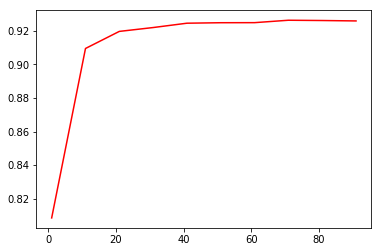

In [102]:
x=np.arange(1,101,10)
plt.subplot(111)#产生1行1列的1个画布
plt.plot(x,scores,'r-')
plt.show()

In [103]:
#最大得分落在20-40的树之间
scores2=[]
for e in range(37,47):
    random_tree3=RandomForestClassifier(n_estimators=e,random_state=90)
    random_tree3.fit(train_vecs,y_train)
    e_score=cross_val_score(random_tree3,train_vecs,y_train,cv=10).mean()
    scores2.append(e_score)

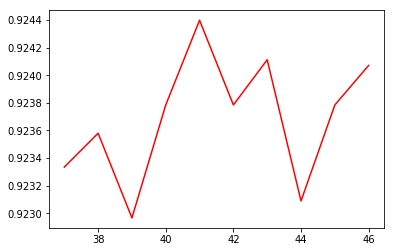

In [104]:
x=np.arange(37,47)
plt.subplot(111)#产生1行1列的1个画布
plt.plot(x,scores2,'r-')
plt.show()

In [107]:
#即当树在41颗的时候准确率最好
random_tree41=RandomForestClassifier(n_estimators=41)
random_tree41.fit(train_vecs,y_train)
random_tree41.score(train_vecs,y_train)

0.9976656564829224

In [109]:
random_tree41.score(test_vecs,y_test)
#通过调参，成功使得准确率提高了一个点

0.9333078540034397

In [110]:
#保存随机森林模型
joblib.dump(random_tree41,'随机森林模型准确率93%')

['随机森林模型准确率93%']

In [81]:
#使用K近邻模型
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_vecs,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
knn.score(train_vecs,y_train)

0.8691129494635105

In [83]:
knn.score(test_vecs,y_test)

0.7964838524746799

In [84]:
#使用朴素贝叶斯

In [85]:
from sklearn.naive_bayes import GaussianNB
bys=GaussianNB()
bys.fit(train_vecs,y_train)

GaussianNB(priors=None)

In [86]:
bys.score(train_vecs,y_train)

0.7461708575640921

In [87]:
bys.score(test_vecs,y_test)

0.7466080642079114